# Introduction to Regression with Neural Networks in Tensorflow

Regression is basically predicting numerical variables based on other combinations of variables

In [1]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


# Create some data to view and fit

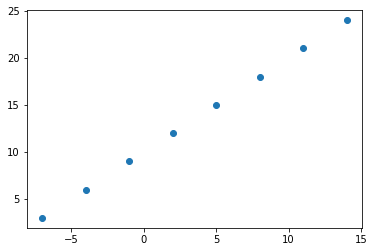

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4,-1,2,5,8,11,14])

#Create labels
y=np.array([3.0,6,9,12,15,18,21,24])

#Visualise it
plt.scatter(X,y)

In [3]:
#See the relationship between X and y
y ==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
X = tf.cast(tf.constant(X),dtype=tf.float32)
y= tf.cast(tf.constant(y),dtype=tf.float32)

In [5]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

# Modelling in Tensorflow

1. **Create a model** - define input and output layers as well as the hidden layers of the neural network
2. **Compiling model** - Define the loss function and optimizers
3. **Fitting the model** on the training data
4. **Evaluvate the model** on the testing data

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [7]:
#Set random seed for repoducability
tf.random.set_seed(42)

#1. Create a model using the Sequential API

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1) # Just one layer
# ])

#2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X,y,epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 998us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 0s/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 997us/step - loss: 10.9748 - mae: 10.9748


In [8]:
#Chck X and y values
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
#Make a prediction using out model
model.predict([17.0])

array([[12.716021]], dtype=float32)

From the above, we notice the predicted value is far ahead of the expected value.

# Improving the model
To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [10]:
#Rebuilding our model -> Increaseing the number of epochs to 100

#1. Create the model 
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

#3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 995us/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 997us/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 996us/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 996us/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 998us/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 998us/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [=============================

1/1 [==============================] - 0s 2ms/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 997us/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 1000us/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 964us/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 997us/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 998us/step - loss: 6

Just by altering one hyperparameter from our model i.e. number of epochs , we reduced our loss to around 7.

In [11]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
model.predict([17])

array([[29.739855]], dtype=float32)

This prediction is much better than before from 12 to 29. 

In [13]:
#Rebuilding the model -> Here we change the the optimizer from SGD to Adam

#1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss = tf.keras.losses.MAE,
             optimizer = tf.keras.optimizers.Adam(),
             metrics=["mae"])

#3. Fit the model
model.fit(X,y,epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 1000us/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 997us/step - loss: 10.5691 - mae: 10.5691
Epoch 3/100
1/1 [==============================] - 0s 996us/step - loss: 10.5646 - mae: 10.5646
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5601 - mae: 10.5601
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5556 - mae: 10.5556
Epoch 6/100
1/1 [==============================] - 0s 999us/step - loss: 10.5511 - mae: 10.5511
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5466 - mae: 10.5466
Epoch 8/100
1/1 [==============================] - 0s 998us/step - loss: 10.5421 - mae: 10.5421
Epoch 9/100
1/1 [==============================] - 0s 997us/step - loss: 10.5376 - mae: 10.5376
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5331 - mae: 10.5331
Epoch 11/100
1/1 [============================

1/1 [==============================] - 0s 999us/step - loss: 10.1911 - mae: 10.1911
Epoch 87/100
1/1 [==============================] - 0s 1ms/step - loss: 10.1866 - mae: 10.1866
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1821 - mae: 10.1821
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1776 - mae: 10.1776
Epoch 90/100
1/1 [==============================] - 0s 998us/step - loss: 10.1731 - mae: 10.1731
Epoch 91/100
1/1 [==============================] - 0s 997us/step - loss: 10.1686 - mae: 10.1686
Epoch 92/100
1/1 [==============================] - 0s 997us/step - loss: 10.1641 - mae: 10.1641
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1596 - mae: 10.1596
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1551 - mae: 10.1551
Epoch 95/100
1/1 [==============================] - 0s 997us/step - loss: 10.1506 - mae: 10.1506
Epoch 96/100
1/1 [==============================] - 0

In [14]:
model.predict([17.0])

array([[16.014063]], dtype=float32)

In [15]:
#Create another model

#1. Create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation=None)) #Additional hidden layer added
model.add(tf.keras.layers.Dense(1))

#2.Compile model
model.compile(loss=tf.keras.losses.MAE,
             optimizer = tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])

#3.Fit the model
model.fit(X,y,epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 2ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/150
1/1 [==============================] - 0s 1ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/150
1/1 [==============================] - 0s 996us/step - loss: 12.8450 - mae: 12.8450
Epoch 4/150
1/1 [==============================] - 0s 999us/step - loss: 12.1611 - mae: 12.1611
Epoch 5/150
1/1 [==============================] - 0s 2ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/150
1/1 [==============================] - 0s 3ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/150
1/1 [==============================] - 0s 2ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/150
1/1 [==============================] - 0s 997us/step - loss: 9.4153 - mae: 9.4153
Epoch 9/150
1/1 [==============================] - 0s 994us/step - loss: 8.7133 - mae: 8.7133
Epoch 10/150
1/1 [==============================] - 0s 999us/step - loss: 7.9998 - mae: 7.9998
Epoch 11/150
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 997us/step - loss: 0.3402 - mae: 0.3402
Epoch 88/150
1/1 [==============================] - 0s 998us/step - loss: 0.4551 - mae: 0.4551
Epoch 89/150
1/1 [==============================] - 0s 2ms/step - loss: 0.3949 - mae: 0.3949
Epoch 90/150
1/1 [==============================] - 0s 0s/step - loss: 0.2212 - mae: 0.2212
Epoch 91/150
1/1 [==============================] - 0s 997us/step - loss: 0.2634 - mae: 0.2634
Epoch 92/150
1/1 [==============================] - 0s 996us/step - loss: 0.0835 - mae: 0.0835
Epoch 93/150
1/1 [==============================] - 0s 998us/step - loss: 0.2379 - mae: 0.2379
Epoch 94/150
1/1 [==============================] - 0s 2ms/step - loss: 0.1928 - mae: 0.1928
Epoch 95/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2699 - mae: 0.2699
Epoch 96/150
1/1 [==============================] - 0s 998us/step - loss: 0.3601 - mae: 0.3601
Epoch 97/150
1/1 [==============================] - 0s 2ms/step - loss: 

In [16]:
int(model.predict([21]))

30

<b>NOTE : Common ways to improve a deep model :</b>
1. Adding Layers
2. Increasing number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

<b> Thus because we can alter all of these, they are called hyperparameters</b>

# Evaluvating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [17]:
#Now lets make a larger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [18]:
#Labels for the above dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

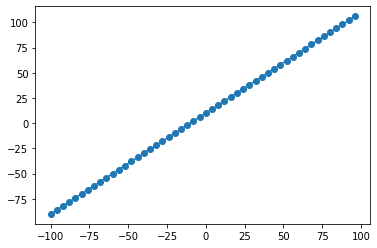

In [19]:
#Visualise the data
import matplotlib.pyplot as plt

plt.plot(X,y)
plt.scatter(X,y)

# Splitting the dataset into 2-3 sets 


* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [20]:
#Check the length of how many samples 
len(X) , len(y) 

(50, 50)

In [21]:
#Split the data to train and test
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

In [22]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

# Visualise the data

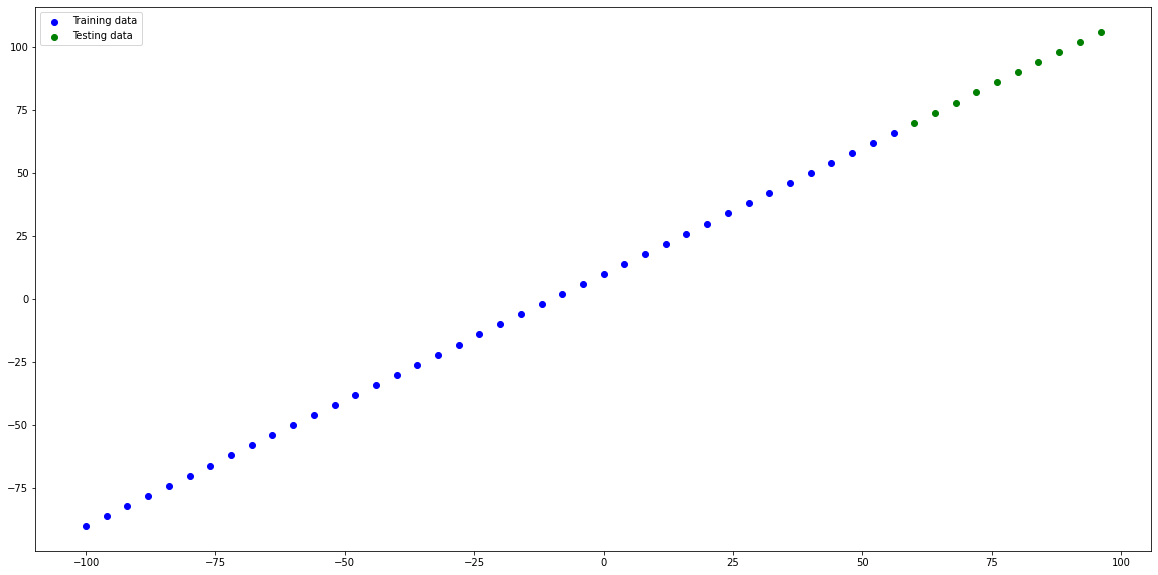

In [23]:
plt.figure(figsize=(20, 10))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend()
plt.show()

In [24]:
#Build neural network for our data
tf.random.set_seed(42)
#1.Create model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Compile model 
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.keras.optimizers.SGD(),
             metrics = ['mae'])

#3.Fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 128ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 998us/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 997us/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 997us/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 998us/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 992us/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 984us/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 498us/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] -

2/2 [==============================] - 0s 998us/step - loss: 9.2433 - mae: 9.2433
Epoch 87/100
2/2 [==============================] - 0s 996us/step - loss: 12.0209 - mae: 12.0209
Epoch 88/100
2/2 [==============================] - 0s 982us/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 996us/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 996us/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 979u

# Visualising our model

Let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [48]:
#Build neural network for our data
tf.random.set_seed(42)

#1.Create model
model=tf.keras.Sequential(name="model_1")
model.add(tf.keras.layers.Dense(100,input_shape=[1],name="input_layer")) #Input shape is 1 in this case
model.add(tf.keras.layers.Dense(1,name="output_layer"))
#Compile model 
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics = ['mae'])

#3.Fit the model
model.fit(X_train,y_train,epochs=5000)

Epoch 1/5000
2/2 [==============================] - 0s 0s/step - loss: 35.3962 - mae: 35.3962
Epoch 2/5000
2/2 [==============================] - 0s 499us/step - loss: 35.1863 - mae: 35.1863
Epoch 3/5000
2/2 [==============================] - 0s 499us/step - loss: 34.9845 - mae: 34.9845
Epoch 4/5000
2/2 [==============================] - 0s 997us/step - loss: 34.7775 - mae: 34.7775
Epoch 5/5000
2/2 [==============================] - 0s 997us/step - loss: 34.5754 - mae: 34.5754
Epoch 6/5000
2/2 [==============================] - 0s 2ms/step - loss: 34.3712 - mae: 34.3712
Epoch 7/5000
2/2 [==============================] - 0s 1ms/step - loss: 34.1651 - mae: 34.1651
Epoch 8/5000
2/2 [==============================] - 0s 1ms/step - loss: 33.9520 - mae: 33.9520
Epoch 9/5000
2/2 [==============================] - 0s 1ms/step - loss: 33.7538 - mae: 33.7538
Epoch 10/5000
2/2 [==============================] - 0s 1ms/step - loss: 33.5572 - mae: 33.5572
Epoch 11/5000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 18.6161 - mae: 18.6161
Epoch 86/5000
2/2 [==============================] - 0s 499us/step - loss: 18.4281 - mae: 18.4281
Epoch 87/5000
2/2 [==============================] - 0s 996us/step - loss: 18.2325 - mae: 18.2325
Epoch 88/5000
2/2 [==============================] - 0s 997us/step - loss: 18.0467 - mae: 18.0467
Epoch 89/5000
2/2 [==============================] - 0s 998us/step - loss: 17.8463 - mae: 17.8463
Epoch 90/5000
2/2 [==============================] - 0s 997us/step - loss: 17.6536 - mae: 17.6536
Epoch 91/5000
2/2 [==============================] - 0s 498us/step - loss: 17.4521 - mae: 17.4521
Epoch 92/5000
2/2 [==============================] - 0s 2ms/step - loss: 17.2605 - mae: 17.2605
Epoch 93/5000
2/2 [==============================] - 0s 499us/step - loss: 17.0617 - mae: 17.0617
Epoch 94/5000
2/2 [==============================] - 0s 998us/step - loss: 16.8591 - mae: 16.8591
Epoch 95/5000
2/2 [===================

2/2 [==============================] - 0s 1ms/step - loss: 7.5585 - mae: 7.5585
Epoch 170/5000
2/2 [==============================] - 0s 997us/step - loss: 7.5473 - mae: 7.5473
Epoch 171/5000
2/2 [==============================] - 0s 997us/step - loss: 7.5428 - mae: 7.5428
Epoch 172/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.5379 - mae: 7.5379
Epoch 173/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.5330 - mae: 7.5330
Epoch 174/5000
2/2 [==============================] - 0s 998us/step - loss: 7.5292 - mae: 7.5292
Epoch 175/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.5251 - mae: 7.5251
Epoch 176/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.5190 - mae: 7.5190
Epoch 177/5000
2/2 [==============================] - 0s 998us/step - loss: 7.5147 - mae: 7.5147
Epoch 178/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.5099 - mae: 7.5099
Epoch 179/5000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 998us/step - loss: 7.2512 - mae: 7.2512
Epoch 255/5000
2/2 [==============================] - 0s 982us/step - loss: 7.2476 - mae: 7.2476
Epoch 256/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.2448 - mae: 7.2448
Epoch 257/5000
2/2 [==============================] - 0s 2ms/step - loss: 7.2412 - mae: 7.2412
Epoch 258/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.2368 - mae: 7.2368
Epoch 259/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.2336 - mae: 7.2336
Epoch 260/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.2314 - mae: 7.2314
Epoch 261/5000
2/2 [==============================] - 0s 997us/step - loss: 7.2271 - mae: 7.2271
Epoch 262/5000
2/2 [==============================] - 0s 2ms/step - loss: 7.2241 - mae: 7.2241
Epoch 263/5000
2/2 [==============================] - 0s 976us/step - loss: 7.2219 - mae: 7.2219
Epoch 264/5000
2/2 [==============================] - 0s 

Epoch 339/5000
2/2 [==============================] - 0s 999us/step - loss: 7.0090 - mae: 7.0090
Epoch 340/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.0080 - mae: 7.0080
Epoch 341/5000
2/2 [==============================] - 0s 996us/step - loss: 7.0065 - mae: 7.0065
Epoch 342/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.0049 - mae: 7.0049
Epoch 343/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.0034 - mae: 7.0034
Epoch 344/5000
2/2 [==============================] - 0s 1ms/step - loss: 7.0022 - mae: 7.0022
Epoch 345/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.9992 - mae: 6.9992
Epoch 346/5000
2/2 [==============================] - 0s 519us/step - loss: 6.9967 - mae: 6.9967
Epoch 347/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.9927 - mae: 6.9927
Epoch 348/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.9893 - mae: 6.9893
Epoch 349/5000
2/2 [========================

2/2 [==============================] - 0s 997us/step - loss: 6.7874 - mae: 6.7874
Epoch 425/5000
2/2 [==============================] - 0s 997us/step - loss: 6.7923 - mae: 6.7923
Epoch 426/5000
2/2 [==============================] - 0s 997us/step - loss: 6.7893 - mae: 6.7893
Epoch 427/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.7902 - mae: 6.7902
Epoch 428/5000
2/2 [==============================] - 0s 998us/step - loss: 6.7881 - mae: 6.7881
Epoch 429/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.7880 - mae: 6.7880
Epoch 430/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.7836 - mae: 6.7836
Epoch 431/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.7792 - mae: 6.7792
Epoch 432/5000
2/2 [==============================] - 0s 998us/step - loss: 6.7748 - mae: 6.7748
Epoch 433/5000
2/2 [==============================] - 0s 995us/step - loss: 6.7708 - mae: 6.7708
Epoch 434/5000
2/2 [==============================] -

2/2 [==============================] - 0s 1ms/step - loss: 6.5772 - mae: 6.5772
Epoch 510/5000
2/2 [==============================] - 0s 994us/step - loss: 6.5749 - mae: 6.5749
Epoch 511/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.5810 - mae: 6.5810
Epoch 512/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.5746 - mae: 6.5746
Epoch 513/5000
2/2 [==============================] - 0s 996us/step - loss: 6.5721 - mae: 6.5721
Epoch 514/5000
2/2 [==============================] - 0s 996us/step - loss: 6.5695 - mae: 6.5695
Epoch 515/5000
2/2 [==============================] - 0s 997us/step - loss: 6.5669 - mae: 6.5669
Epoch 516/5000
2/2 [==============================] - 0s 997us/step - loss: 6.5649 - mae: 6.5649
Epoch 517/5000
2/2 [==============================] - 0s 997us/step - loss: 6.5613 - mae: 6.5613
Epoch 518/5000
2/2 [==============================] - 0s 994us/step - loss: 6.5590 - mae: 6.5590
Epoch 519/5000
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 6.3700 - mae: 6.3700
Epoch 595/5000
2/2 [==============================] - 0s 979us/step - loss: 6.3666 - mae: 6.3666
Epoch 596/5000
2/2 [==============================] - 0s 997us/step - loss: 6.3678 - mae: 6.3678
Epoch 597/5000
2/2 [==============================] - 0s 997us/step - loss: 6.3591 - mae: 6.3591
Epoch 598/5000
2/2 [==============================] - 0s 978us/step - loss: 6.3583 - mae: 6.3583
Epoch 599/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.3573 - mae: 6.3573
Epoch 600/5000
2/2 [==============================] - 0s 978us/step - loss: 6.3613 - mae: 6.3613
Epoch 601/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.3579 - mae: 6.3579
Epoch 602/5000
2/2 [==============================] - 0s 998us/step - loss: 6.3551 - mae: 6.3551
Epoch 603/5000
2/2 [==============================] - 0s 997us/step - loss: 6.3514 - mae: 6.3514
Epoch 604/5000
2/2 [==============================]

Epoch 679/5000
2/2 [==============================] - 0s 998us/step - loss: 6.1585 - mae: 6.1585
Epoch 680/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.1579 - mae: 6.1579
Epoch 681/5000
2/2 [==============================] - 0s 982us/step - loss: 6.1594 - mae: 6.1594
Epoch 682/5000
2/2 [==============================] - 0s 997us/step - loss: 6.1610 - mae: 6.1610
Epoch 683/5000
2/2 [==============================] - 0s 499us/step - loss: 6.1582 - mae: 6.1582
Epoch 684/5000
2/2 [==============================] - 0s 2ms/step - loss: 6.1551 - mae: 6.1551
Epoch 685/5000
2/2 [==============================] - 0s 1ms/step - loss: 6.1509 - mae: 6.1509
Epoch 686/5000
2/2 [==============================] - 0s 996us/step - loss: 6.1472 - mae: 6.1472
Epoch 687/5000
2/2 [==============================] - 0s 998us/step - loss: 6.1430 - mae: 6.1430
Epoch 688/5000
2/2 [==============================] - 0s 997us/step - loss: 6.1383 - mae: 6.1383
Epoch 689/5000
2/2 [================

2/2 [==============================] - 0s 997us/step - loss: 5.9438 - mae: 5.9438
Epoch 764/5000
2/2 [==============================] - 0s 1ms/step - loss: 5.9414 - mae: 5.9414
Epoch 765/5000
2/2 [==============================] - 0s 2ms/step - loss: 5.9420 - mae: 5.9420
Epoch 766/5000
2/2 [==============================] - 0s 997us/step - loss: 5.9372 - mae: 5.9372
Epoch 767/5000
2/2 [==============================] - 0s 998us/step - loss: 5.9345 - mae: 5.9345
Epoch 768/5000
2/2 [==============================] - 0s 1ms/step - loss: 5.9317 - mae: 5.9317
Epoch 769/5000
2/2 [==============================] - 0s 999us/step - loss: 5.9287 - mae: 5.9287
Epoch 770/5000
2/2 [==============================] - 0s 978us/step - loss: 5.9256 - mae: 5.9256
Epoch 771/5000
2/2 [==============================] - 0s 997us/step - loss: 5.9235 - mae: 5.9235
Epoch 772/5000
2/2 [==============================] - 0s 996us/step - loss: 5.9194 - mae: 5.9194
Epoch 773/5000
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 5.7209 - mae: 5.7209
Epoch 849/5000
2/2 [==============================] - 0s 997us/step - loss: 5.7172 - mae: 5.7172
Epoch 850/5000
2/2 [==============================] - 0s 1ms/step - loss: 5.7146 - mae: 5.7146
Epoch 851/5000
2/2 [==============================] - 0s 992us/step - loss: 5.7113 - mae: 5.7113
Epoch 852/5000
2/2 [==============================] - 0s 1ms/step - loss: 5.7088 - mae: 5.7088
Epoch 853/5000
2/2 [==============================] - 0s 982us/step - loss: 5.7061 - mae: 5.7061
Epoch 854/5000
2/2 [==============================] - 0s 998us/step - loss: 5.7056 - mae: 5.7056
Epoch 855/5000
2/2 [==============================] - 0s 996us/step - loss: 5.7059 - mae: 5.7059
Epoch 856/5000
2/2 [==============================] - 0s 2ms/step - loss: 5.7034 - mae: 5.7034
Epoch 857/5000
2/2 [==============================] - 0s 1000us/step - loss: 5.6995 - mae: 5.6995
Epoch 858/5000
2/2 [==============================] 

2/2 [==============================] - 0s 2ms/step - loss: 5.4946 - mae: 5.4946
Epoch 934/5000
2/2 [==============================] - 0s 2ms/step - loss: 5.4879 - mae: 5.4879
Epoch 935/5000
2/2 [==============================] - 0s 998us/step - loss: 5.4836 - mae: 5.4836
Epoch 936/5000
2/2 [==============================] - 0s 2ms/step - loss: 5.4801 - mae: 5.4801
Epoch 937/5000
2/2 [==============================] - 0s 996us/step - loss: 5.4749 - mae: 5.4749
Epoch 938/5000
2/2 [==============================] - 0s 997us/step - loss: 5.4766 - mae: 5.4766
Epoch 939/5000
2/2 [==============================] - 0s 998us/step - loss: 5.4779 - mae: 5.4779
Epoch 940/5000
2/2 [==============================] - 0s 519us/step - loss: 5.4739 - mae: 5.4739
Epoch 941/5000
2/2 [==============================] - 0s 1ms/step - loss: 5.4696 - mae: 5.4696
Epoch 942/5000
2/2 [==============================] - 0s 1ms/step - loss: 5.4651 - mae: 5.4651
Epoch 943/5000
2/2 [==============================] - 0

2/2 [==============================] - 0s 987us/step - loss: 5.2503 - mae: 5.2503
Epoch 1018/5000
2/2 [==============================] - 0s 996us/step - loss: 5.2491 - mae: 5.2491
Epoch 1019/5000
2/2 [==============================] - 0s 996us/step - loss: 5.2479 - mae: 5.2479
Epoch 1020/5000
2/2 [==============================] - 0s 997us/step - loss: 5.2465 - mae: 5.2465
Epoch 1021/5000
2/2 [==============================] - 0s 997us/step - loss: 5.2444 - mae: 5.2444
Epoch 1022/5000
2/2 [==============================] - 0s 998us/step - loss: 5.2417 - mae: 5.2417
Epoch 1023/5000
2/2 [==============================] - 0s 498us/step - loss: 5.2407 - mae: 5.2407
Epoch 1024/5000
2/2 [==============================] - 0s 2ms/step - loss: 5.2365 - mae: 5.2365
Epoch 1025/5000
2/2 [==============================] - 0s 996us/step - loss: 5.2374 - mae: 5.2374
Epoch 1026/5000
2/2 [==============================] - 0s 997us/step - loss: 5.2353 - mae: 5.2353
Epoch 1027/5000
2/2 [=================

2/2 [==============================] - 0s 998us/step - loss: 5.0033 - mae: 5.0033
Epoch 1101/5000
2/2 [==============================] - 0s 985us/step - loss: 4.9987 - mae: 4.9987
Epoch 1102/5000
2/2 [==============================] - 0s 997us/step - loss: 4.9960 - mae: 4.9960
Epoch 1103/5000
2/2 [==============================] - 0s 998us/step - loss: 4.9924 - mae: 4.9924
Epoch 1104/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.9930 - mae: 4.9930
Epoch 1105/5000
2/2 [==============================] - 0s 991us/step - loss: 4.9852 - mae: 4.9852
Epoch 1106/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.9837 - mae: 4.9837
Epoch 1107/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.9827 - mae: 4.9827
Epoch 1108/5000
2/2 [==============================] - 0s 993us/step - loss: 4.9841 - mae: 4.9841
Epoch 1109/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.9837 - mae: 4.9837
Epoch 1110/5000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 4.7475 - mae: 4.7475
Epoch 1185/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.7435 - mae: 4.7435
Epoch 1186/5000
2/2 [==============================] - 0s 499us/step - loss: 4.7399 - mae: 4.7399
Epoch 1187/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.7377 - mae: 4.7377
Epoch 1188/5000
2/2 [==============================] - ETA: 0s - loss: 4.8236 - mae: 4.823 - 0s 997us/step - loss: 4.7365 - mae: 4.7365
Epoch 1189/5000
2/2 [==============================] - 0s 997us/step - loss: 4.7309 - mae: 4.7309
Epoch 1190/5000
2/2 [==============================] - 0s 997us/step - loss: 4.7292 - mae: 4.7292
Epoch 1191/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.7241 - mae: 4.7241
Epoch 1192/5000
2/2 [==============================] - 0s 998us/step - loss: 4.7219 - mae: 4.7219
Epoch 1193/5000
2/2 [==============================] - 0s 998us/step - loss: 4.7180 - mae: 4.7180
Epoch 

2/2 [==============================] - 0s 996us/step - loss: 4.4764 - mae: 4.4764
Epoch 1268/5000
2/2 [==============================] - 0s 998us/step - loss: 4.4815 - mae: 4.4815
Epoch 1269/5000
2/2 [==============================] - 0s 998us/step - loss: 4.4822 - mae: 4.4822
Epoch 1270/5000
2/2 [==============================] - 0s 997us/step - loss: 4.4797 - mae: 4.4797
Epoch 1271/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.4746 - mae: 4.4746
Epoch 1272/5000
2/2 [==============================] - 0s 998us/step - loss: 4.4667 - mae: 4.4667
Epoch 1273/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.4542 - mae: 4.4542
Epoch 1274/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.4489 - mae: 4.4489
Epoch 1275/5000
2/2 [==============================] - 0s 997us/step - loss: 4.4429 - mae: 4.4429
Epoch 1276/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.4536 - mae: 4.4536
Epoch 1277/5000
2/2 [=======================

2/2 [==============================] - 0s 999us/step - loss: 4.1879 - mae: 4.1879
Epoch 1352/5000
2/2 [==============================] - 0s 998us/step - loss: 4.1839 - mae: 4.1839
Epoch 1353/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.1810 - mae: 4.1810
Epoch 1354/5000
2/2 [==============================] - 0s 998us/step - loss: 4.1783 - mae: 4.1783
Epoch 1355/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.1755 - mae: 4.1755
Epoch 1356/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.1695 - mae: 4.1695
Epoch 1357/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.1661 - mae: 4.1661
Epoch 1358/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.1633 - mae: 4.1633
Epoch 1359/5000
2/2 [==============================] - 0s 999us/step - loss: 4.1583 - mae: 4.1583
Epoch 1360/5000
2/2 [==============================] - 0s 1ms/step - loss: 4.1536 - mae: 4.1536
Epoch 1361/5000
2/2 [===========================

2/2 [==============================] - 0s 1ms/step - loss: 3.8796 - mae: 3.8796
Epoch 1436/5000
2/2 [==============================] - 0s 998us/step - loss: 3.8754 - mae: 3.8754
Epoch 1437/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.8746 - mae: 3.8746
Epoch 1438/5000
2/2 [==============================] - 0s 990us/step - loss: 3.8667 - mae: 3.8667
Epoch 1439/5000
2/2 [==============================] - 0s 1000us/step - loss: 3.8654 - mae: 3.8654
Epoch 1440/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.8613 - mae: 3.8613
Epoch 1441/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.8578 - mae: 3.8578
Epoch 1442/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.8555 - mae: 3.8555
Epoch 1443/5000
2/2 [==============================] - 0s 500us/step - loss: 3.8508 - mae: 3.8508
Epoch 1444/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.8468 - mae: 3.8468
Epoch 1445/5000
2/2 [==========================

2/2 [==============================] - 0s 1ms/step - loss: 3.5621 - mae: 3.5621
Epoch 1520/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.5591 - mae: 3.5591
Epoch 1521/5000
2/2 [==============================] - 0s 997us/step - loss: 3.5544 - mae: 3.5544
Epoch 1522/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.5488 - mae: 3.5488
Epoch 1523/5000
2/2 [==============================] - 0s 998us/step - loss: 3.5501 - mae: 3.5501
Epoch 1524/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.5506 - mae: 3.5506
Epoch 1525/5000
2/2 [==============================] - 0s 996us/step - loss: 3.5502 - mae: 3.5502
Epoch 1526/5000
2/2 [==============================] - 0s 997us/step - loss: 3.5491 - mae: 3.5491
Epoch 1527/5000
2/2 [==============================] - 0s 997us/step - loss: 3.5477 - mae: 3.5477
Epoch 1528/5000
2/2 [==============================] - 0s 998us/step - loss: 3.5427 - mae: 3.5427
Epoch 1529/5000
2/2 [=======================

2/2 [==============================] - 0s 998us/step - loss: 3.2328 - mae: 3.2328
Epoch 1604/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.2228 - mae: 3.2228
Epoch 1605/5000
2/2 [==============================] - 0s 998us/step - loss: 3.2184 - mae: 3.2184
Epoch 1606/5000
2/2 [==============================] - 0s 499us/step - loss: 3.2150 - mae: 3.2150
Epoch 1607/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.2093 - mae: 3.2093
Epoch 1608/5000
2/2 [==============================] - 0s 997us/step - loss: 3.2054 - mae: 3.2054
Epoch 1609/5000
2/2 [==============================] - 0s 997us/step - loss: 3.2079 - mae: 3.2079
Epoch 1610/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.2026 - mae: 3.2026
Epoch 1611/5000
2/2 [==============================] - 0s 997us/step - loss: 3.1932 - mae: 3.1932
Epoch 1612/5000
2/2 [==============================] - 0s 1ms/step - loss: 3.1921 - mae: 3.1921
Epoch 1613/5000
2/2 [=======================

2/2 [==============================] - 0s 979us/step - loss: 2.8774 - mae: 2.8774
Epoch 1688/5000
2/2 [==============================] - 0s 997us/step - loss: 2.8698 - mae: 2.8698
Epoch 1689/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.8601 - mae: 2.8601
Epoch 1690/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.8571 - mae: 2.8571
Epoch 1691/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.8565 - mae: 2.8565
Epoch 1692/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.8528 - mae: 2.8528
Epoch 1693/5000
2/2 [==============================] - 0s 997us/step - loss: 2.8431 - mae: 2.8431
Epoch 1694/5000
2/2 [==============================] - 0s 1000us/step - loss: 2.8363 - mae: 2.8363
Epoch 1695/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.8368 - mae: 2.8368
Epoch 1696/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.8442 - mae: 2.8442
Epoch 1697/5000
2/2 [==========================

2/2 [==============================] - 0s 1ms/step - loss: 2.5081 - mae: 2.5081
Epoch 1772/5000
2/2 [==============================] - 0s 997us/step - loss: 2.5099 - mae: 2.5099
Epoch 1773/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.5052 - mae: 2.5052
Epoch 1774/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.4997 - mae: 2.4997
Epoch 1775/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4893 - mae: 2.4893
Epoch 1776/5000
2/2 [==============================] - 0s 996us/step - loss: 2.4847 - mae: 2.4847
Epoch 1777/5000
2/2 [==============================] - 0s 998us/step - loss: 2.4779 - mae: 2.4779
Epoch 1778/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4743 - mae: 2.4743
Epoch 1779/5000
2/2 [==============================] - 0s 997us/step - loss: 2.4746 - mae: 2.4746
Epoch 1780/5000
2/2 [==============================] - 0s 998us/step - loss: 2.4718 - mae: 2.4718
Epoch 1781/5000
2/2 [=========================

2/2 [==============================] - 0s 1ms/step - loss: 2.1155 - mae: 2.1155
Epoch 1856/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.1163 - mae: 2.1163
Epoch 1857/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.1125 - mae: 2.1125
Epoch 1858/5000
2/2 [==============================] - 0s 993us/step - loss: 2.1052 - mae: 2.1052
Epoch 1859/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.0935 - mae: 2.0935
Epoch 1860/5000
2/2 [==============================] - 0s 997us/step - loss: 2.0857 - mae: 2.0857
Epoch 1861/5000
2/2 [==============================] - 0s 998us/step - loss: 2.0790 - mae: 2.0790
Epoch 1862/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.0898 - mae: 2.0898
Epoch 1863/5000
2/2 [==============================] - 0s 979us/step - loss: 2.0998 - mae: 2.0998
Epoch 1864/5000
2/2 [==============================] - 0s 1ms/step - loss: 2.0954 - mae: 2.0954
Epoch 1865/5000
2/2 [===========================

2/2 [==============================] - 0s 997us/step - loss: 1.7030 - mae: 1.7030
Epoch 1940/5000
2/2 [==============================] - 0s 997us/step - loss: 1.7064 - mae: 1.7064
Epoch 1941/5000
2/2 [==============================] - 0s 1ms/step - loss: 1.6977 - mae: 1.6977
Epoch 1942/5000
2/2 [==============================] - 0s 997us/step - loss: 1.6886 - mae: 1.6886
Epoch 1943/5000
2/2 [==============================] - 0s 998us/step - loss: 1.6823 - mae: 1.6823
Epoch 1944/5000
2/2 [==============================] - 0s 1ms/step - loss: 1.6858 - mae: 1.6858
Epoch 1945/5000
2/2 [==============================] - 0s 986us/step - loss: 1.6925 - mae: 1.6925
Epoch 1946/5000
2/2 [==============================] - 0s 997us/step - loss: 1.6941 - mae: 1.6941
Epoch 1947/5000
2/2 [==============================] - 0s 1ms/step - loss: 1.6866 - mae: 1.6866
Epoch 1948/5000
2/2 [==============================] - 0s 984us/step - loss: 1.6794 - mae: 1.6794
Epoch 1949/5000
2/2 [=====================

2/2 [==============================] - 0s 997us/step - loss: 1.3111 - mae: 1.3111
Epoch 2024/5000
2/2 [==============================] - 0s 996us/step - loss: 1.2986 - mae: 1.2986
Epoch 2025/5000
2/2 [==============================] - 0s 1ms/step - loss: 1.2782 - mae: 1.2782
Epoch 2026/5000
2/2 [==============================] - 0s 998us/step - loss: 1.2658 - mae: 1.2658
Epoch 2027/5000
2/2 [==============================] - 0s 2ms/step - loss: 1.2598 - mae: 1.2598
Epoch 2028/5000
2/2 [==============================] - 0s 1ms/step - loss: 1.2556 - mae: 1.2556
Epoch 2029/5000
2/2 [==============================] - 0s 499us/step - loss: 1.2473 - mae: 1.2473
Epoch 2030/5000
2/2 [==============================] - 0s 997us/step - loss: 1.2474 - mae: 1.2474
Epoch 2031/5000
2/2 [==============================] - 0s 1ms/step - loss: 1.2402 - mae: 1.2402
Epoch 2032/5000
2/2 [==============================] - 0s 977us/step - loss: 1.2350 - mae: 1.2350
Epoch 2033/5000
2/2 [=======================

2/2 [==============================] - 0s 998us/step - loss: 0.8385 - mae: 0.8385
Epoch 2108/5000
2/2 [==============================] - 0s 996us/step - loss: 0.8286 - mae: 0.8286
Epoch 2109/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.8206 - mae: 0.8206
Epoch 2110/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.8201 - mae: 0.8201
Epoch 2111/5000
2/2 [==============================] - 0s 988us/step - loss: 0.8145 - mae: 0.8145
Epoch 2112/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.8059 - mae: 0.8059
Epoch 2113/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.8008 - mae: 0.8008
Epoch 2114/5000
2/2 [==============================] - 0s 997us/step - loss: 0.7966 - mae: 0.7966
Epoch 2115/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.7902 - mae: 0.7902
Epoch 2116/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.7860 - mae: 0.7860
Epoch 2117/5000
2/2 [===========================

2/2 [==============================] - 0s 1ms/step - loss: 0.3925 - mae: 0.3925
Epoch 2192/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.3781 - mae: 0.3781
Epoch 2193/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.3792 - mae: 0.3792
Epoch 2194/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.3684 - mae: 0.3684
Epoch 2195/5000
2/2 [==============================] - 0s 997us/step - loss: 0.3563 - mae: 0.3563
Epoch 2196/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.3595 - mae: 0.3595
Epoch 2197/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.3593 - mae: 0.3593
Epoch 2198/5000
2/2 [==============================] - 0s 998us/step - loss: 0.3413 - mae: 0.3413
Epoch 2199/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.3463 - mae: 0.3463
Epoch 2200/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.3336 - mae: 0.3336
Epoch 2201/5000
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 0.0823 - mae: 0.0823
Epoch 2276/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0376 - mae: 0.0376
Epoch 2277/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0543 - mae: 0.0543
Epoch 2278/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0577 - mae: 0.0577
Epoch 2279/5000
2/2 [==============================] - 0s 994us/step - loss: 0.0532 - mae: 0.0532
Epoch 2280/5000
2/2 [==============================] - 0s 979us/step - loss: 0.0636 - mae: 0.0636
Epoch 2281/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0480 - mae: 0.0480
Epoch 2282/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0433 - mae: 0.0433
Epoch 2283/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0159 - mae: 0.0159
Epoch 2284/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0790 - mae: 0.0790
Epoch 2285/5000
2/2 [=======================

2/2 [==============================] - 0s 997us/step - loss: 0.0101 - mae: 0.0101
Epoch 2360/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0017 - mae: 0.0017
Epoch 2361/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0154 - mae: 0.0154
Epoch 2362/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0282 - mae: 0.0282
Epoch 2363/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0172 - mae: 0.0172
Epoch 2364/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0389 - mae: 0.0389
Epoch 2365/5000
2/2 [==============================] - 0s 993us/step - loss: 0.0217 - mae: 0.0217
Epoch 2366/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0176 - mae: 0.0176
Epoch 2367/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0447 - mae: 0.0447
Epoch 2368/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0116 - mae: 0.0116
Epoch 2369/5000
2/2 [=======================

2/2 [==============================] - 0s 997us/step - loss: 0.0719 - mae: 0.0719
Epoch 2444/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0216 - mae: 0.0216
Epoch 2445/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0775 - mae: 0.0775
Epoch 2446/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0412 - mae: 0.0412
Epoch 2447/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0642 - mae: 0.0642
Epoch 2448/5000
2/2 [==============================] - 0s 985us/step - loss: 0.0937 - mae: 0.0937
Epoch 2449/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0371 - mae: 0.0371
Epoch 2450/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0333 - mae: 0.0333
Epoch 2451/5000
2/2 [==============================] - 0s 999us/step - loss: 0.0149 - mae: 0.0149
Epoch 2452/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0452 - mae: 0.0452
Epoch 2453/5000
2/2 [=========================

2/2 [==============================] - 0s 997us/step - loss: 0.0134 - mae: 0.0134
Epoch 2528/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0080 - mae: 0.0080
Epoch 2529/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0030 - mae: 0.0030
Epoch 2530/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0028 - mae: 0.0028
Epoch 2531/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0126 - mae: 0.0126
Epoch 2532/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0088 - mae: 0.0088
Epoch 2533/5000
2/2 [==============================] - 0s 499us/step - loss: 0.0183 - mae: 0.0183
Epoch 2534/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0099 - mae: 0.0099
Epoch 2535/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0302 - mae: 0.0302
Epoch 2536/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0176 - mae: 0.0176
Epoch 2537/5000
2/2 [===================

2/2 [==============================] - 0s 997us/step - loss: 0.0414 - mae: 0.0414
Epoch 2611/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0217 - mae: 0.0217
Epoch 2612/5000
2/2 [==============================] - 0s 498us/step - loss: 0.0302 - mae: 0.0302
Epoch 2613/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0270 - mae: 0.0270
Epoch 2614/5000
2/2 [==============================] - 0s 995us/step - loss: 0.0268 - mae: 0.0268
Epoch 2615/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0360 - mae: 0.0360
Epoch 2616/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0503 - mae: 0.0503
Epoch 2617/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0098 - mae: 0.0098
Epoch 2618/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0643 - mae: 0.0643
Epoch 2619/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0376 - mae: 0.0376
Epoch 2620/5000
2/2 [=========================

2/2 [==============================] - 0s 997us/step - loss: 0.0139 - mae: 0.0139
Epoch 2695/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0269 - mae: 0.0269
Epoch 2696/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0064 - mae: 0.0064
Epoch 2697/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0369 - mae: 0.0369
Epoch 2698/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0127 - mae: 0.0127
Epoch 2699/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0485 - mae: 0.0485
Epoch 2700/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0210 - mae: 0.0210
Epoch 2701/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0239 - mae: 0.0239
Epoch 2702/5000
2/2 [==============================] - 0s 509us/step - loss: 0.0058 - mae: 0.0058
Epoch 2703/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0040 - mae: 0.0040
Epoch 2704/5000
2/2 [=========================

2/2 [==============================] - 0s 998us/step - loss: 0.0500 - mae: 0.0500
Epoch 2779/5000
2/2 [==============================] - 0s 0s/step - loss: 0.0093 - mae: 0.0093
Epoch 2780/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0789 - mae: 0.0789
Epoch 2781/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0769 - mae: 0.0769
Epoch 2782/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0223 - mae: 0.0223
Epoch 2783/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0646 - mae: 0.0646
Epoch 2784/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0681 - mae: 0.0681
Epoch 2785/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0205 - mae: 0.0205
Epoch 2786/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0486 - mae: 0.0486
Epoch 2787/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0371 - mae: 0.0371
Epoch 2788/5000
2/2 [==========================

2/2 [==============================] - 0s 997us/step - loss: 0.0180 - mae: 0.0180
Epoch 2863/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0099 - mae: 0.0099
Epoch 2864/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0045 - mae: 0.0045
Epoch 2865/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0039 - mae: 0.0039
Epoch 2866/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0038 - mae: 0.0038
Epoch 2867/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0054 - mae: 0.0054
Epoch 2868/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0063 - mae: 0.0063
Epoch 2869/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0048 - mae: 0.0048
Epoch 2870/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0070 - mae: 0.0070
Epoch 2871/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.0225
Epoch 2872/5000
2/2 [=========================

2/2 [==============================] - 0s 999us/step - loss: 0.0049 - mae: 0.0049
Epoch 2947/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0069
Epoch 2948/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0021 - mae: 0.0021    
Epoch 2949/5000
2/2 [==============================] - 0s 999us/step - loss: 0.0112 - mae: 0.0112
Epoch 2950/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0069
Epoch 2951/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0071
Epoch 2952/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0143 - mae: 0.0143
Epoch 2953/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0063 - mae: 0.0063
Epoch 2954/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0147 - mae: 0.0147
Epoch 2955/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0073 - mae: 0.0073
Epoch 2956/5000
2/2 [=========================

2/2 [==============================] - 0s 1ms/step - loss: 0.0185 - mae: 0.0185
Epoch 3031/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0319 - mae: 0.0319
Epoch 3032/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0348 - mae: 0.0348
Epoch 3033/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0151 - mae: 0.0151
Epoch 3034/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0182 - mae: 0.0182
Epoch 3035/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0329 - mae: 0.0329
Epoch 3036/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0446 - mae: 0.0446
Epoch 3037/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0118 - mae: 0.0118
Epoch 3038/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0550 - mae: 0.0550
Epoch 3039/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0368 - mae: 0.0368
Epoch 3040/5000
2/2 [=============================

2/2 [==============================] - 0s 998us/step - loss: 0.0366 - mae: 0.0366
Epoch 3115/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0052
Epoch 3116/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0099 - mae: 0.0099
Epoch 3117/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0079 - mae: 0.0079
Epoch 3118/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0095 - mae: 0.0095
Epoch 3119/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0063 - mae: 0.0063
Epoch 3120/5000
2/2 [==============================] - 0s 999us/step - loss: 0.0015 - mae: 0.0015
Epoch 3121/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0065 - mae: 0.0065
Epoch 3122/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0045
Epoch 3123/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0127 - mae: 0.0127
Epoch 3124/5000
2/2 [==============================]

2/2 [==============================] - 0s 2ms/step - loss: 0.0113 - mae: 0.0113
Epoch 3199/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0095 - mae: 0.0095
Epoch 3200/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0070 - mae: 0.0070
Epoch 3201/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0153 - mae: 0.0153
Epoch 3202/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0248 - mae: 0.0248
Epoch 3203/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0307 - mae: 0.0307
Epoch 3204/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0151 - mae: 0.0151
Epoch 3205/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0167 - mae: 0.0167
Epoch 3206/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0343 - mae: 0.0343
Epoch 3207/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0456 - mae: 0.0456
Epoch 3208/5000
2/2 [=============================

2/2 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.0217
Epoch 3283/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0091 - mae: 0.0091
Epoch 3284/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0088 - mae: 0.0088
Epoch 3285/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0273 - mae: 0.0273
Epoch 3286/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0097 - mae: 0.0097
Epoch 3287/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0379 - mae: 0.0379
Epoch 3288/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0158 - mae: 0.0158
Epoch 3289/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0210 - mae: 0.0210
Epoch 3290/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0065 - mae: 0.0065
Epoch 3291/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0023
Epoch 3292/5000
2/2 [=========================

2/2 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0033
Epoch 3367/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0022 - mae: 0.0022
Epoch 3368/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0085 - mae: 0.0085
Epoch 3369/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0119 - mae: 0.0119
Epoch 3370/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0018
Epoch 3371/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0135 - mae: 0.0135
Epoch 3372/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0042
Epoch 3373/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0086 - mae: 0.0086
Epoch 3374/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0123 - mae: 0.0123
Epoch 3375/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0026 - mae: 0.0026
Epoch 3376/5000
2/2 [===========================

2/2 [==============================] - 0s 996us/step - loss: 0.0345 - mae: 0.0345
Epoch 3451/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0139 - mae: 0.0139
Epoch 3452/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0243 - mae: 0.0243
Epoch 3453/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0022 - mae: 0.0022
Epoch 3454/5000
2/2 [==============================] - 0s 1ms/step - loss: 9.7744e-04 - mae: 9.7744e-04
Epoch 3455/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0078 - mae: 0.0078
Epoch 3456/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0133 - mae: 0.0133
Epoch 3457/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0031 - mae: 0.0031
Epoch 3458/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0059 - mae: 0.0059
Epoch 3459/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0122 - mae: 0.0122
Epoch 3460/5000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.0266 - mae: 0.0266
Epoch 3535/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0030    
Epoch 3536/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0059 - mae: 0.0059
Epoch 3537/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0267 - mae: 0.0267
Epoch 3538/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0052 - mae: 0.0052
Epoch 3539/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0095 - mae: 0.0095
Epoch 3540/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0090 - mae: 0.0090
Epoch 3541/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057
Epoch 3542/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - mae: 0.0024    
Epoch 3543/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0084 - mae: 0.0084
Epoch 3544/5000
2/2 [=========================

2/2 [==============================] - 0s 1ms/step - loss: 0.0169 - mae: 0.0169
Epoch 3619/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0058 - mae: 0.0058
Epoch 3620/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0055 - mae: 0.0055
Epoch 3621/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0026
Epoch 3622/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0035 - mae: 0.0035
Epoch 3623/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0082 - mae: 0.0082
Epoch 3624/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0106
Epoch 3625/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0045
Epoch 3626/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0057 - mae: 0.0057
Epoch 3627/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0032 - mae: 0.0032
Epoch 3628/5000
2/2 [=============================

2/2 [==============================] - 0s 1ms/step - loss: 0.0124 - mae: 0.0124
Epoch 3703/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0706 - mae: 0.0706
Epoch 3704/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0759 - mae: 0.0759
Epoch 3705/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0295 - mae: 0.0295
Epoch 3706/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0321 - mae: 0.0321
Epoch 3707/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0258 - mae: 0.0258
Epoch 3708/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0297 - mae: 0.0297
Epoch 3709/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0350 - mae: 0.0350
Epoch 3710/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0123 - mae: 0.0123
Epoch 3711/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0127 - mae: 0.0127
Epoch 3712/5000
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 0.0151 - mae: 0.0151
Epoch 3787/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0093 - mae: 0.0093
Epoch 3788/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0149 - mae: 0.0149
Epoch 3789/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0020 - mae: 0.0020
Epoch 3790/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0033 - mae: 0.0033
Epoch 3791/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0012
Epoch 3792/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0069
Epoch 3793/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0117 - mae: 0.0117
Epoch 3794/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0060 - mae: 0.0060
Epoch 3795/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0136 - mae: 0.0136
Epoch 3796/5000
2/2 [=========================

2/2 [==============================] - 0s 499us/step - loss: 0.0042 - mae: 0.0042
Epoch 3871/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0096 - mae: 0.0096
Epoch 3872/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0074 - mae: 0.0074
Epoch 3873/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0132 - mae: 0.0132
Epoch 3874/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0070 - mae: 0.0070
Epoch 3875/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0032 - mae: 0.0032
Epoch 3876/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0088 - mae: 0.0088
Epoch 3877/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0106 - mae: 0.0106
Epoch 3878/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0287 - mae: 0.0287
Epoch 3879/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0317 - mae: 0.0317
Epoch 3880/5000
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.0430 - mae: 0.0430
Epoch 3955/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0311 - mae: 0.0311
Epoch 3956/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0255 - mae: 0.0255
Epoch 3957/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0389 - mae: 0.0389
Epoch 3958/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0123 - mae: 0.0123
Epoch 3959/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0475 - mae: 0.0475
Epoch 3960/5000
2/2 [==============================] - 0s 980us/step - loss: 0.0222 - mae: 0.0222
Epoch 3961/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0426 - mae: 0.0426
Epoch 3962/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0529 - mae: 0.0529
Epoch 3963/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0152
Epoch 3964/5000
2/2 [===========================

2/2 [==============================] - 0s 1ms/step - loss: 0.0118 - mae: 0.0118
Epoch 4039/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0067
Epoch 4040/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0261 - mae: 0.0261
Epoch 4041/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0033
Epoch 4042/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0055 - mae: 0.0055
Epoch 4043/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0219 - mae: 0.0219
Epoch 4044/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0111 - mae: 0.0111
Epoch 4045/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0077 - mae: 0.0077
Epoch 4046/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0253 - mae: 0.0253
Epoch 4047/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0055 - mae: 0.0055
Epoch 4048/5000
2/2 [===========================

2/2 [==============================] - 0s 1ms/step - loss: 0.0080 - mae: 0.0080
Epoch 4123/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0203 - mae: 0.0203
Epoch 4124/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0145 - mae: 0.0145
Epoch 4125/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0126 - mae: 0.0126
Epoch 4126/5000
2/2 [==============================] - 0s 498us/step - loss: 0.0079 - mae: 0.0079
Epoch 4127/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0224 - mae: 0.0224
Epoch 4128/5000
2/2 [==============================] - 0s 980us/step - loss: 0.0186 - mae: 0.0186
Epoch 4129/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0295 - mae: 0.0295
Epoch 4130/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0378 - mae: 0.0378
Epoch 4131/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0048 - mae: 0.0048
Epoch 4132/5000
2/2 [=============================

2/2 [==============================] - 0s 998us/step - loss: 0.0056 - mae: 0.0056
Epoch 4207/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.0214
Epoch 4208/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0058 - mae: 0.0058
Epoch 4209/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0036 - mae: 0.0036
Epoch 4210/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0150 - mae: 0.0150
Epoch 4211/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0083 - mae: 0.0083
Epoch 4212/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0129
Epoch 4213/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0213 - mae: 0.0213
Epoch 4214/5000
2/2 [==============================] - 0s 497us/step - loss: 0.0135 - mae: 0.0135
Epoch 4215/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0058 - mae: 0.0058
Epoch 4216/5000
2/2 [=============================

2/2 [==============================] - 0s 1ms/step - loss: 0.0304 - mae: 0.0304
Epoch 4291/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0083 - mae: 0.0083
Epoch 4292/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0447 - mae: 0.0447
Epoch 4293/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0206 - mae: 0.0206
Epoch 4294/5000
2/2 [==============================] - 0s 999us/step - loss: 0.0498 - mae: 0.0498
Epoch 4295/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0772 - mae: 0.0772
Epoch 4296/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0435 - mae: 0.0435
Epoch 4297/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0317 - mae: 0.0317
Epoch 4298/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0625 - mae: 0.0625
Epoch 4299/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0319 - mae: 0.0319
Epoch 4300/5000
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0069
Epoch 4375/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0053 - mae: 0.0053
Epoch 4376/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0137 - mae: 0.0137
Epoch 4377/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0043
Epoch 4378/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0058 - mae: 0.0058
Epoch 4379/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0126 - mae: 0.0126
Epoch 4380/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 4381/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0147 - mae: 0.0147
Epoch 4382/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0080 - mae: 0.0080
Epoch 4383/5000
2/2 [==============================] - 0s 979us/step - loss: 0.0112 - mae: 0.0112
Epoch 4384/5000
2/2 [==============================]

Epoch 4459/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0017 - mae: 0.0017
Epoch 4460/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0039
Epoch 4461/5000
2/2 [==============================] - 0s 995us/step - loss: 0.0062 - mae: 0.0062
Epoch 4462/5000
2/2 [==============================] - 0s 499us/step - loss: 0.0158 - mae: 0.0158
Epoch 4463/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0167 - mae: 0.0167
Epoch 4464/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0109 - mae: 0.0109
Epoch 4465/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0140 - mae: 0.0140
Epoch 4466/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0207 - mae: 0.0207
Epoch 4467/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0173 - mae: 0.0173
Epoch 4468/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0338 - mae: 0.0338
Epoch 4469/5000
2/2 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.0249 - mae: 0.0249
Epoch 4544/5000
2/2 [==============================] - 0s 996us/step - loss: 0.0177 - mae: 0.0177
Epoch 4545/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0367 - mae: 0.0367
Epoch 4546/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0534 - mae: 0.0534
Epoch 4547/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0195 - mae: 0.0195
Epoch 4548/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0315 - mae: 0.0315
Epoch 4549/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0152 - mae: 0.0152
Epoch 4550/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0204 - mae: 0.0204
Epoch 4551/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0061 - mae: 0.0061
Epoch 4552/5000
2/2 [==============================] - 0s 978us/step - loss: 0.0085 - mae: 0.0085
Epoch 4553/5000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0039
Epoch 4628/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0065 - mae: 0.0065
Epoch 4629/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0190 - mae: 0.0190
Epoch 4630/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0123 - mae: 0.0123
Epoch 4631/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0080 - mae: 0.0080
Epoch 4632/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0238 - mae: 0.0238
Epoch 4633/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0089 - mae: 0.0089
Epoch 4634/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0084 - mae: 0.0084
Epoch 4635/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0129 - mae: 0.0129
Epoch 4636/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0073 - mae: 0.0073
Epoch 4637/5000
2/2 [===========================

2/2 [==============================] - 0s 997us/step - loss: 0.0354 - mae: 0.0354
Epoch 4712/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0159 - mae: 0.0159
Epoch 4713/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0219 - mae: 0.0219
Epoch 4714/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0049 - mae: 0.0049
Epoch 4715/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0267 - mae: 0.0267
Epoch 4716/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0028 - mae: 0.0028
Epoch 4717/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0030 - mae: 0.0030  
Epoch 4718/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0285 - mae: 0.0285
Epoch 4719/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0064 - mae: 0.0064
Epoch 4720/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0479 - mae: 0.0479
Epoch 4721/5000
2/2 [=================

2/2 [==============================] - 0s 1ms/step - loss: 0.0139 - mae: 0.0139
Epoch 4796/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0223 - mae: 0.0223
Epoch 4797/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0204 - mae: 0.0204
Epoch 4798/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0268 - mae: 0.0268
Epoch 4799/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0276 - mae: 0.0276
Epoch 4800/5000
2/2 [==============================] - 0s 999us/step - loss: 0.0175 - mae: 0.0175
Epoch 4801/5000
2/2 [==============================] - 0s 999us/step - loss: 0.0141 - mae: 0.0141
Epoch 4802/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0060 - mae: 0.0060
Epoch 4803/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0061 - mae: 0.0061
Epoch 4804/5000
2/2 [==============================] - 0s 974us/step - loss: 0.0069 - mae: 0.0069
Epoch 4805/5000
2/2 [===========================

2/2 [==============================] - 0s 998us/step - loss: 0.0078 - mae: 0.0078
Epoch 4880/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0216 - mae: 0.0216
Epoch 4881/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0076 - mae: 0.0076
Epoch 4882/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0076 - mae: 0.0076
Epoch 4883/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0101 - mae: 0.0101
Epoch 4884/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0034 - mae: 0.0034
Epoch 4885/5000
2/2 [==============================] - 0s 2ms/step - loss: 0.0059 - mae: 0.0059
Epoch 4886/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0187 - mae: 0.0187
Epoch 4887/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0152
Epoch 4888/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0128 - mae: 0.0128
Epoch 4889/5000
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 0.0251 - mae: 0.0251
Epoch 4964/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0243 - mae: 0.0243
Epoch 4965/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0218 - mae: 0.0218
Epoch 4966/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0163 - mae: 0.0163
Epoch 4967/5000
2/2 [==============================] - 0s 998us/step - loss: 0.0161 - mae: 0.0161
Epoch 4968/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0063 - mae: 0.0063    
Epoch 4969/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0379 - mae: 0.0379
Epoch 4970/5000
2/2 [==============================] - 0s 997us/step - loss: 0.0151 - mae: 0.0151
Epoch 4971/5000
2/2 [==============================] - 0s 1ms/step - loss: 0.0293 - mae: 0.0293
Epoch 4972/5000
2/2 [==============================] - 0s 498us/step - loss: 0.0121 - mae: 0.0121
Epoch 4973/5000
2/2 [=======================

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 100)               200       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).


We can see that one neuron has two trainable parameters associated with it i.e. weights and biases

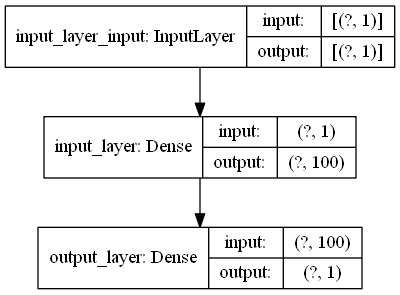

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

# Visualising our model predictions


Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [52]:
model.predict([100])

array([[110.01607]], dtype=float32)

In [54]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.009514],
       [ 74.01016 ],
       [ 78.010826],
       [ 82.01148 ],
       [ 86.01213 ],
       [ 90.01279 ],
       [ 94.01344 ],
       [ 98.0141  ],
       [102.014755],
       [106.01542 ]], dtype=float32)

In [64]:
#Plotting function to visaulise the prediction and ground truth data
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

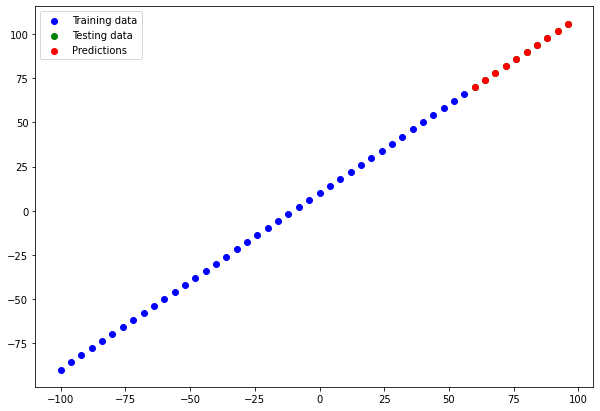

In [65]:
plot_predictions()

We can see the predictions have overlapped the Testing data which is quite good